In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv(r'C:\Users\wjaku\Downloads\sales\sales_data_sample.csv', encoding='unicode_escape')

In [3]:
sales.head(4)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   object 


In [5]:
sales.columns=sales.columns.str.lower()

In [6]:
sales.drop(['addressline2', 'territory', 'postalcode'], axis=1, inplace=True)

In [7]:
pd.set_option('display.max_columns', 21)

In [8]:
sales.rename(columns={'month_id':'month','qtr_id':'qtr','year_id': 'year'}, inplace=True)

In [9]:
sales['sales']=sales['quantityordered']*sales['priceeach']

### 1. Sales analysis

#### Change in sales value over time

In [10]:
sales['orderdate']=pd.to_datetime(sales['orderdate'])

In [11]:
sales['month_year']=sales['month'].astype(str)+'.'+ sales['year'].astype(str)

In [12]:
sales_per_orderdate=sales.groupby('month_year')['sales'].sum().reset_index()

In [13]:
sorted_sale=sales_per_orderdate.sort_values(by='month_year', key=lambda x: pd.to_datetime(x, format='%m.%Y')).reset_index()

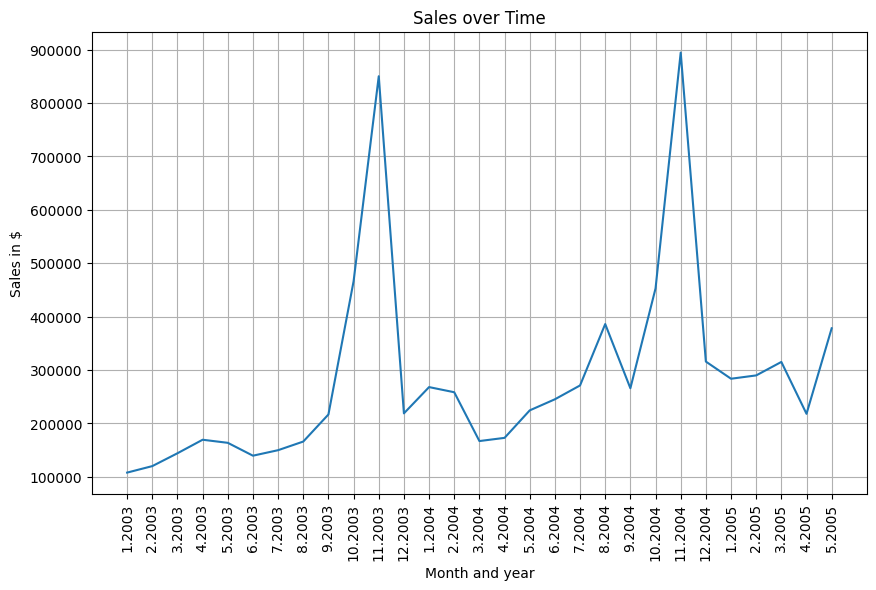

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_sale, x='month_year', y='sales')
plt.xticks(rotation=90)
plt.xlabel('Month and year')
plt.ylabel('Sales in $')
plt.title('Sales over Time')
plt.grid(True)
plt.show()

#### Sales value per month and per quarter

In [25]:
sales_per_month=sales.groupby('month')['sales'].sum()

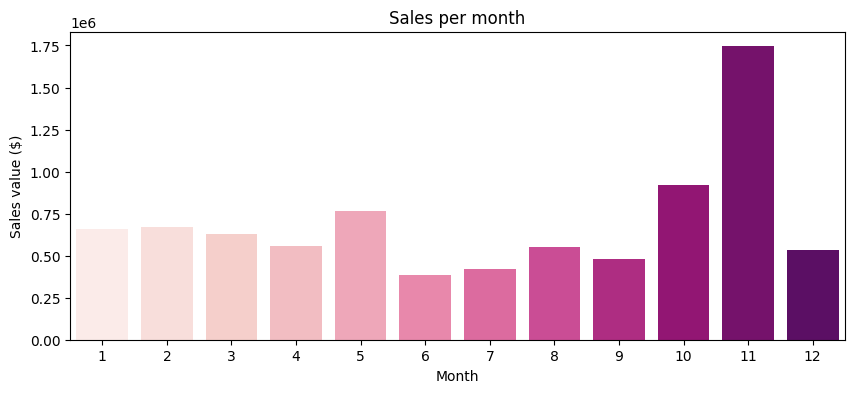

In [36]:
df3=sales_per_month.reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=df3, x='month', y='sales', palette='RdPu')
plt.xlabel('Month')
plt.ylabel('Sales value ($)')
plt.title('Sales per month')
plt.xticks(range(len(df3)), df3['month'])

plt.show()

In [27]:
sales_per_qtr=sales.groupby('qtr')['sales'].sum()

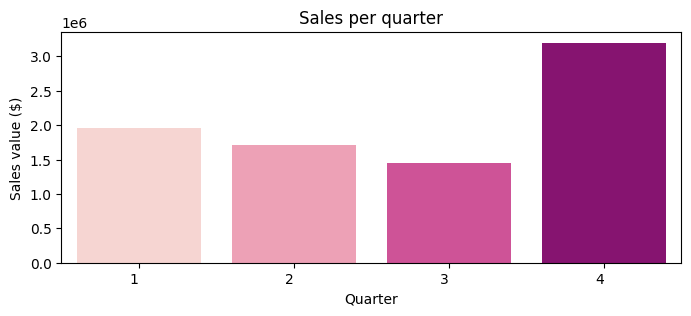

In [35]:
df4=sales_per_qtr.reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(data=df4, x='qtr', y='sales', palette='RdPu')
plt.xlabel('Quarter')
plt.ylabel('Sales value ($)')
plt.title('Sales per quarter')
plt.xticks(range(len(df4)), df4['qtr'], rotation=0, ha='right')

plt.show()

#### Sales for various categories of products

In [17]:
total_sale=sales.groupby('productline')['sales'].sum().sort_values(ascending=True)

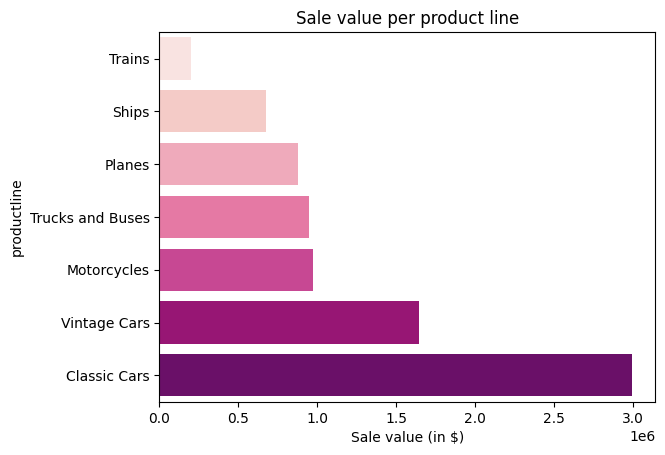

In [20]:
df8=total_sale.reset_index()

sns.barplot(data=df8, x=total_sale.values,y='productline', palette='RdPu')
plt.xlabel('Sale value (in $)')
plt.title('Sale value per product line')
plt.show()

#### Sales in individual countries

In [21]:
sales_by_country=sales.groupby(['country'])['sales'].sum()

In [51]:
sorted_sales_by_country=sales_by_country.sort_values(ascending=True)

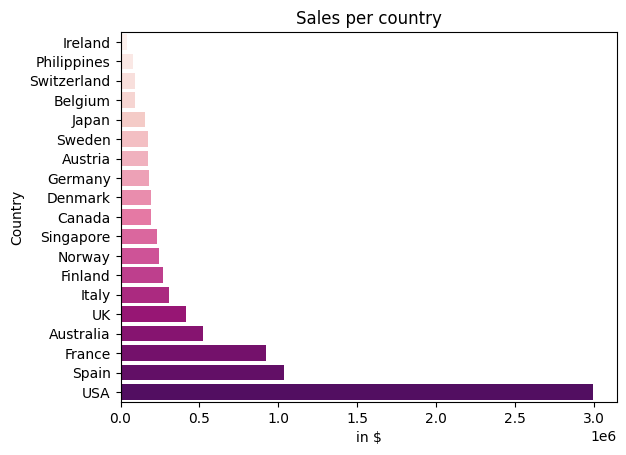

In [53]:
sns.barplot(x=sorted_sales_by_country.values, y=sorted_sales_by_country.index, palette='RdPu')
plt.xlabel('in $')
plt.ylabel('Country')
plt.title('Sales per country')
plt.show()

## Order analysis

#### Order value per month and quarter

In [29]:
unique_orders=sales.drop_duplicates('ordernumber')
orders_per_month=unique_orders.groupby('month')['ordernumber'].count()

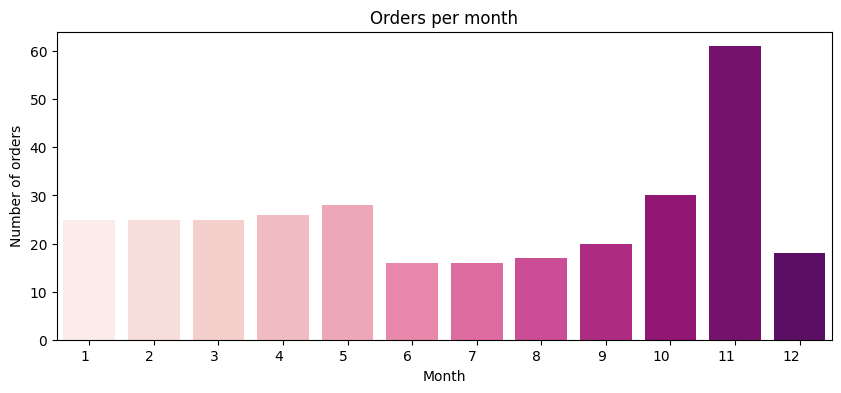

In [30]:
df = orders_per_month.reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='month', y='ordernumber', palette='RdPu')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Orders per month')
plt.xticks(range(len(df)), df['month'], rotation=0, ha='right')

plt.show()

In [31]:
orders_per_qtr=unique_orders.groupby('qtr')['ordernumber'].count()

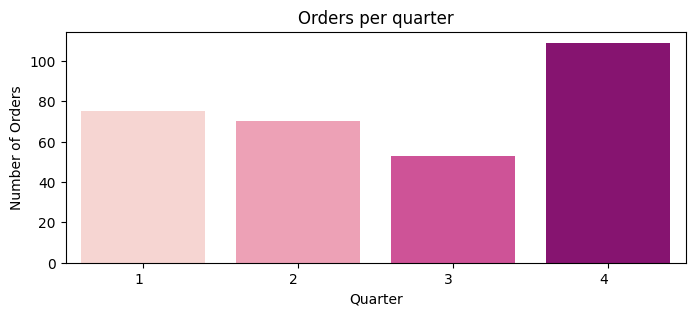

In [34]:
df2 = orders_per_qtr.reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(data=df2, x='qtr', y='ordernumber', palette='RdPu')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.title('Orders per quarter')
plt.xticks(range(len(df2)), df2['qtr'], rotation=0, ha='right')

plt.show()

#### Order statuses

In [37]:
status_count=unique_orders.groupby(['status'])['orderlinenumber'].count()
status_percentages=(status_count/status_count.sum())*100
print(status_percentages)

status
Cancelled      1.302932
Disputed       0.977199
In Process     1.954397
On Hold        1.302932
Resolved       1.302932
Shipped       93.159609
Name: orderlinenumber, dtype: float64


In [41]:
#Analysis of remaining statuses - other than 'Shipped'

In [39]:
is_same_status=sales.groupby('ordernumber')['status'].nunique()==1

In [40]:
if is_same_status.all():
    print("For each order, every position has the same status.")
else:
    print("For some orders, different positions have a different satuses")

For each order, every position has the same status.


In [42]:
other_status=unique_orders[unique_orders['status']!='Shipped']
other_status_count=other_status.groupby(['status'])['orderlinenumber'].count()
other_status_perc=(other_status_count/other_status_count.sum())*100

In [43]:
other_status_perc

status
Cancelled     19.047619
Disputed      14.285714
In Process    28.571429
On Hold       19.047619
Resolved      19.047619
Name: orderlinenumber, dtype: float64

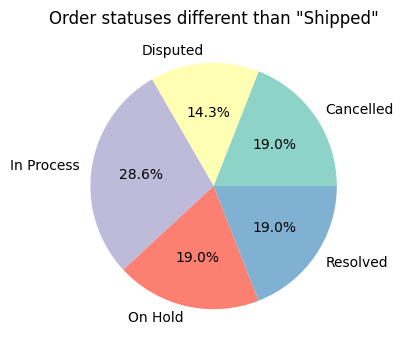

In [47]:
df6=pd.DataFrame({'Other statuses': other_status_perc.index, 'Percentage Share': other_status_perc.values})

colors = plt.cm.Set3(range(len(df6['Other statuses'])))

plt.figure(figsize=(6, 4))
plt.pie(df6['Percentage Share'], labels=df6['Other statuses'], autopct='%.1f%%', colors=colors)
plt.title('Order statuses different than "Shipped"')
plt.show()

## Product analysis

#### Analysis of average prices for different product categories

In [48]:
product_line_mean=sales.groupby('productline')['priceeach'].mean()

In [49]:
product_line_mean

productline
Classic Cars        87.335781
Motorcycles         82.997553
Planes              81.740915
Ships               83.855470
Trains              75.654675
Trucks and Buses    87.527940
Vintage Cars        78.148204
Name: priceeach, dtype: float64

C:\Users\wjaku\AppData\Roaming\Python\Python39\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


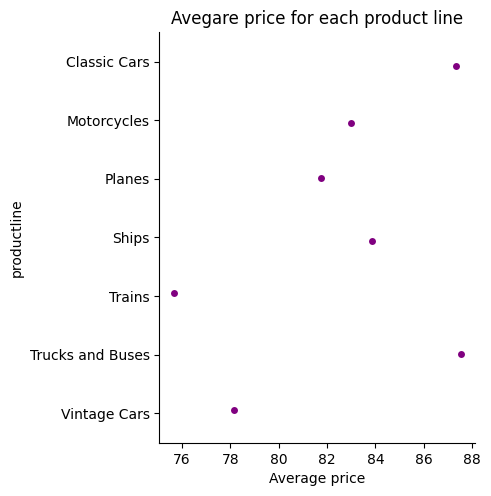

In [50]:
df7=product_line_mean.reset_index()
sns.catplot(data=df7, y='productline', x=product_line_mean.values, color='Purple')
plt.title('Avegare price for each product line')
plt.xlabel('Average price')
plt.show()